In [1]:
import numpy as np

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv('reddit_vm.csv', error_bad_lines=False);
data.head()

title  score      id  \
0  Health Canada approves AstraZeneca COVID-19 va...      7  lt74vw   
1  COVID-19 in Canada: 'Vaccination passports' a ...      2  lsh0ij   
2  Coronavirus variants could fuel Canada's third...      6  lohlle   
3  Canadian government to extend COVID-19 emergen...      1  lnptv8   
4  Canada: Pfizer is 'extremely committed' to mee...      6  lkslm6   

                                                 url  comms_num       created  \
0  https://www.canadaforums.ca/2021/02/health-can...          0  1.614400e+09   
1  https://www.canadaforums.ca/2021/02/covid-19-i...          1  1.614316e+09   
2  https://www.canadaforums.ca/2021/02/coronaviru...          0  1.613887e+09   
3  https://www.canadaforums.ca/2021/02/canadian-g...          0  1.613796e+09   
4  https://www.canadaforums.ca/2021/02/canada-pfi...          0  1.613468e+09   

  body            timestamp  
0  NaN  2021-02-27 06:33:45  
1  NaN  2021-02-26 07:11:07  
2  NaN  2021-02-21 07:50:08  
3  NaN  2021-02-20 06:35:13  
4  NaN  2021-02-16 11:36:28

In [7]:
data.isnull().sum(axis=0)

title           0
score           0
id              0
url          1061
comms_num       0
created         0
body          366
timestamp       0
dtype: int64

In [8]:
data.shape

(1513, 8)

<AxesSubplot:>

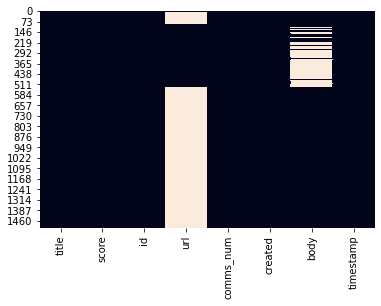

In [9]:
sns.heatmap(data.isnull(),cbar= False)

In [24]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
from nltk import word_tokenize, pos_tag
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
stemmer = PorterStemmer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sudin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Sudin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sudin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [25]:
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [26]:
tokens = word_tokenize("hi this is ren")

nltk.pos_tag(tokens)

[('hi', 'NN'), ('this', 'DT'), ('is', 'VBZ'), ('ren', 'JJ')]

In [27]:
def lemmatize_stemming(text):
   
    token=word_tokenize(text)
  
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, get_wordnet_pos(nltk.pos_tag(token)[0][1])))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return resultpreProcessedText
preProcessedTextWithoutComments = titlesWithoutDupes.apply(preprocess)
preProcessedTextWithoutComments 

In [28]:
preProcessedText = data["title"].apply(preprocess)
titlesWithoutDupes = data["title"].drop_duplicates()
titlesWithoutDupesdictionary = gensim.corpora.Dictionary(preProcessedText)
dictionaryWithoutComents = gensim.corpora.Dictionary(preProcessedTextWithoutComments)

0      Health Canada approves AstraZeneca COVID-19 va...
1      COVID-19 in Canada: 'Vaccination passports' a ...
2      Coronavirus variants could fuel Canada's third...
3      Canadian government to extend COVID-19 emergen...
4      Canada: Pfizer is 'extremely committed' to mee...
                             ...                        
530    I am a father of five unvaccinated children. A...
531          Love Them. Protect Them. Never Inject Them.
532                 Vaccines Are Just Asping For Trouble
533    Dr. Harper explained in her presentation that ...
534    Polio arose in the US at a period where pestic...
Name: title, Length: 453, dtype: object

In [29]:
preProcessedText
preProcessedTextWithoutComments = titlesWithoutDupes.apply(preprocess)
preProcessedTextWithoutComments 

0      [health, canada, approv, astrazeneca, covid, v...
1      [covid, canada, vaccin, passport, near, certai...
2              [coronaviru, variant, fuel, canada, wave]
3      [canadian, govern, extend, covid, emerg, benefit]
4      [canada, pfizer, extrem, commit, meet, vaccin,...
                             ...                        
530    [father, unvaccin, child, unfit, parent, opini...
531                              [love, protect, inject]
532                                [vaccin, asp, troubl]
533    [harper, explain, present, cervic, cancer, ris...
534    [polio, aros, period, pesticid, skyrocket, app...
Name: title, Length: 453, dtype: object

In [30]:
dictionary = gensim.corpora.Dictionary(preProcessedText)
dictionaryWithoutComents = gensim.corpora.Dictionary(preProcessedTextWithoutComments)

In [31]:
#LDA

In [32]:
bow_corpus = [dictionary.doc2bow(doc) for doc in preProcessedText]
bow_corpusWithoutComments = [dictionaryWithoutComents.doc2bow(doc) for doc in preProcessedTextWithoutComments]

In [33]:
lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dictionary,                                    
                                   passes = 20,
                                   workers = 2)
lda_model.show_topics()

[(0,
  '0.084*"vaccin" + 0.010*"covid" + 0.009*"polio" + 0.009*"autism" + 0.008*"child" + 0.008*"anti" + 0.007*"link" + 0.007*"like" + 0.007*"know" + 0.007*"parent"'),
 (1,
  '0.043*"vaccin" + 0.013*"anti" + 0.008*"kill" + 0.007*"child" + 0.007*"proof" + 0.007*"talk" + 0.006*"mercuri" + 0.004*"world" + 0.004*"right" + 0.004*"common"'),
 (2,
  '0.071*"vaccin" + 0.014*"autism" + 0.014*"child" + 0.012*"caus" + 0.010*"peopl" + 0.009*"anti" + 0.008*"want" + 0.007*"like" + 0.007*"say" + 0.007*"think"'),
 (3,
  '0.591*"comment" + 0.005*"anti" + 0.004*"post" + 0.003*"like" + 0.003*"person" + 0.003*"pharma" + 0.003*"claim" + 0.002*"chili" + 0.002*"group" + 0.002*"letter"')]

In [34]:
lda_model_after_removing_dupes = gensim.models.LdaMulticore(bow_corpusWithoutComments,num_topics = 4,id2word = dictionaryWithoutComents,
                                                           passes = 20,workers=2)
lda_model_after_removing_dupes.show_topics()

[(0,
  '0.081*"vaccin" + 0.012*"anti" + 0.007*"covid" + 0.006*"post" + 0.006*"pharma" + 0.006*"fact" + 0.005*"child" + 0.005*"govern" + 0.005*"world" + 0.005*"polio"'),
 (1,
  '0.068*"vaccin" + 0.010*"covid" + 0.010*"immun" + 0.009*"polio" + 0.009*"myth" + 0.008*"measl" + 0.008*"shot" + 0.006*"work" + 0.006*"peopl" + 0.005*"need"'),
 (2,
  '0.046*"vaccin" + 0.025*"autism" + 0.018*"child" + 0.014*"caus" + 0.011*"know" + 0.009*"like" + 0.008*"studi" + 0.008*"anti" + 0.007*"link" + 0.007*"say"'),
 (3,
  '0.035*"vaccin" + 0.020*"anti" + 0.014*"like" + 0.010*"peopl" + 0.009*"child" + 0.009*"cancer" + 0.009*"vaxxer" + 0.008*"inject" + 0.006*"autism" + 0.006*"help"')]

In [35]:
#LDA visualization before removing duplicates from titltes

In [37]:
import pyLDAvis
import pyLDAvis.gensim_models

LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dictionary)
pyLDAvis.display(LDAvis_prepared)

In [40]:
LDAvis_duples = pyLDAvis.gensim_models.prepare(lda_model_after_removing_dupes,bow_corpusWithoutComments,dictionaryWithoutComents)
pyLDAvis.display(LDAvis_duples)

D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
#Activity in subreddit

D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
data["date"]= data["timestamp"].apply(lambda x: pd.Timestamp(x).strftime('%Y-%m-%d'))

D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [77]:
data

D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


title  score       id  \
0     Health Canada approves AstraZeneca COVID-19 va...      7   lt74vw   
1     COVID-19 in Canada: 'Vaccination passports' a ...      2   lsh0ij   
2     Coronavirus variants could fuel Canada's third...      6   lohlle   
3     Canadian government to extend COVID-19 emergen...      1   lnptv8   
4     Canada: Pfizer is 'extremely committed' to mee...      6   lkslm6   
...                                                 ...    ...      ...   
1508                                            Comment      2  ek9vhds   
1509                                            Comment      1  ek9v4u8   
1510                                            Comment      2  ek9ocan   
1511                                            Comment      2  ek9oa6b   
1512                                            Comment      1  ek9nhbq   

                                                    url  comms_num  \
0     https://www.canadaforums.ca/2021/02/health-can...          0   
1     https://www.canadaforums.ca/2021/02/covid-19-i...          1   
2     https://www.canadaforums.ca/2021/02/coronaviru...          0   
3     https://www.canadaforums.ca/2021/02/canadian-g...          0   
4     https://www.canadaforums.ca/2021/02/canada-pfi...          0   
...                                                 ...        ...   
1508                                                NaN          0   
1509                                                NaN          0   
1510                                                NaN          0   
1511                                                NaN          0   
1512                                                NaN          0   

           created                                               body  \
0     1.614400e+09                                                NaN   
1     1.614316e+09                                                NaN   
2     1.613887e+09                                                NaN   
3     1.613796e+09                                                NaN   
4     1.613468e+09                                                NaN   
...            ...                                                ...   
1508  1.554616e+09  Yeah, a long time ago, vaccines weren’t as saf...   
1509  1.554616e+09  So no one has ever been hurt by the mercury in...   
1510  1.554610e+09  But you do have a point there. Going through t...   
1511  1.554610e+09  Going into the blood can cause non-lethal, but...   
1512  1.554609e+09  Good.  But lets say your statement holds, whic...   

                timestamp        date  
0     2021-02-27 06:33:45  2021-02-27  
1     2021-02-26 07:11:07  2021-02-26  
2     2021-02-21 07:50:08  2021-02-21  
3     2021-02-20 06:35:13  2021-02-20  
4     2021-02-16 11:36:28  2021-02-16  
...                   ...         ...  
1508  2019-04-07 08:45:00  2019-04-07  
1509  2019-04-07 08:40:01  2019-04-07  
1510  2019-04-07 07:02:15  2019-04-07  
1511  2019-04-07 07:01:24  2019-04-07  
1512  2019-04-07 06:49:53  2019-04-07  

[1513 rows x 9 columns]

In [44]:
activity = data["date"].value_counts()

D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [45]:
activity = pd.DataFrame(activity)
activity.reset_index(inplace=True)
activity["dates"] =activity["index"]
activity["count"] = activity["date"]
activity.drop(['index','date'],inplace=True,axis=1)

D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


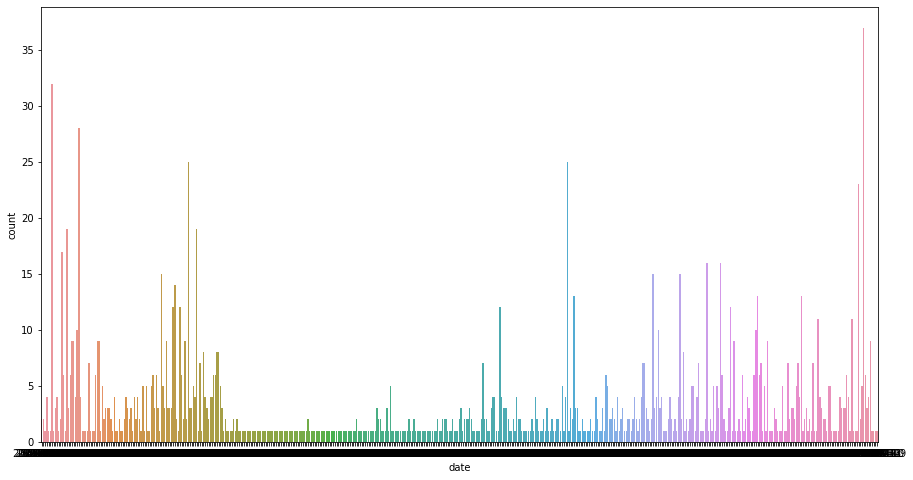

In [46]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,8))

ax=sns.countplot(data=data, x='date')

In [47]:
activity.sort_values(by="dates",inplace=True)

D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


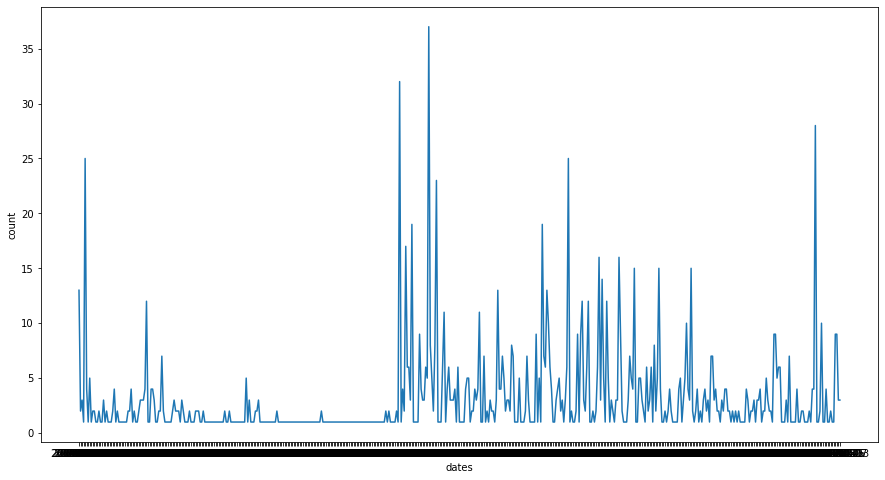

In [48]:
plt.figure(figsize=(15,8))

lx= sns.lineplot(data= activity,x="dates",y="count")

In [49]:
activity["year"] = activity['dates'].apply(lambda x:x[0:4])

D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
activity

D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


dates  count  year
16   2014-01-13     13  2014
227  2014-01-14      2  2014
159  2014-01-15      3  2014
454  2014-01-16      1  2014
3    2014-01-17     25  2014
..          ...    ...   ...
485  2021-04-21      1  2021
32   2021-04-25      9  2021
29   2021-04-26      9  2021
160  2021-04-27      3  2021
156  2021-05-03      3  2021

[497 rows x 3 columns]

In [51]:
yearlyActivity = activity["year"].value_counts()

D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
yearlyActivity = pd.DataFrame(yearlyActivity)

D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [53]:
yearlyActivity.reset_index(inplace=True)
yearlyActivity["years"] = yearlyActivity["index"]
yearlyActivity["count"] = yearlyActivity["year"]

D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


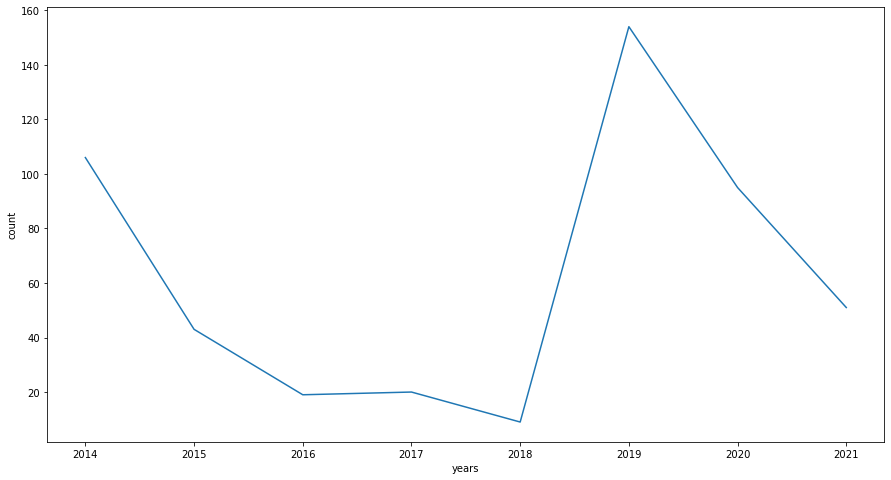

In [54]:
plt.figure(figsize=(15,8))
yearlyActivity.sort_values(by="years",inplace=True)
lx= sns.lineplot(data= yearlyActivity,x="years",y="count")

In [55]:
#LSA

D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [56]:
def detokenize(preProcessedTexts):
    detokenized_doc = []
    for i in range(len(preProcessedTexts)):
        t = ' '.join(preProcessedTexts[i])
        detokenized_doc.append(t)
    return(detokenized_doc)

D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

tfidf_vec = TfidfVectorizer(use_idf=True, norm='l2')
svd = TruncatedSVD(n_components=4)
detokenized_doc = detokenize(preProcessedText)
X= tfidf_vec.fit_transform((detokenized_doc))

D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [58]:
preProcessedText

D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0       [health, canada, approv, astrazeneca, covid, v...
1       [covid, canada, vaccin, passport, near, certai...
2               [coronaviru, variant, fuel, canada, wave]
3       [canadian, govern, extend, covid, emerg, benefit]
4       [canada, pfizer, extrem, commit, meet, vaccin,...
                              ...                        
1508                                            [comment]
1509                                            [comment]
1510                                            [comment]
1511                                            [comment]
1512                                            [comment]
Name: title, Length: 1513, dtype: object

In [59]:
preProcessedTextWithoutComments

D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0      [health, canada, approv, astrazeneca, covid, v...
1      [covid, canada, vaccin, passport, near, certai...
2              [coronaviru, variant, fuel, canada, wave]
3      [canadian, govern, extend, covid, emerg, benefit]
4      [canada, pfizer, extrem, commit, meet, vaccin,...
                             ...                        
530    [father, unvaccin, child, unfit, parent, opini...
531                              [love, protect, inject]
532                                [vaccin, asp, troubl]
533    [harper, explain, present, cervic, cancer, ris...
534    [polio, aros, period, pesticid, skyrocket, app...
Name: title, Length: 453, dtype: object

In [60]:
detokenized_doc_no_comments = detokenize(list(preProcessedTextWithoutComments))
XWithoutComments= tfidf_vec.fit_transform((detokenized_doc_no_comments))

D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [61]:
X.shape

D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(1513, 1427)

In [62]:
x_svd = svd.fit_transform(X)
x_svd_noComment = svd.fit_transform(XWithoutComments)

D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [63]:
svd.fit(X)

D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TruncatedSVD(n_components=4)

In [64]:
svd.components_

D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[ 2.92023424e-12,  1.57529174e-09,  6.14314704e-09, ...,
         4.61396594e-05,  3.73968106e-09,  2.21894272e-09],
       [ 3.81420640e-04,  1.48624863e-03,  9.91062502e-03, ...,
         5.41829369e-03,  5.59166570e-03,  6.55688705e-03],
       [ 7.27429836e-04,  1.06008172e-02, -2.93716139e-03, ...,
         5.31339182e-05, -9.29178049e-04, -2.93958278e-03],
       [ 3.46370709e-03, -4.14268406e-03,  5.81156702e-03, ...,
         2.49339612e-02,  7.29351510e-03, -5.49379869e-03]])

D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


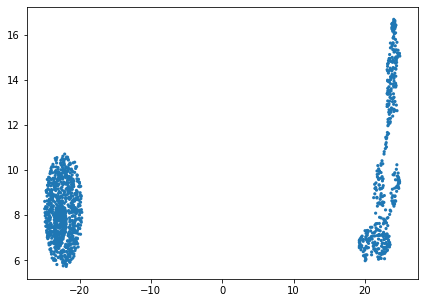

In [71]:
import umap.umap_ as umap
embedding = umap.UMAP(n_neighbors=150, min_dist=0.5, random_state=12).fit_transform(x_svd)

plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], 

s = 10, # size
edgecolor='none'
)
plt.show()

D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


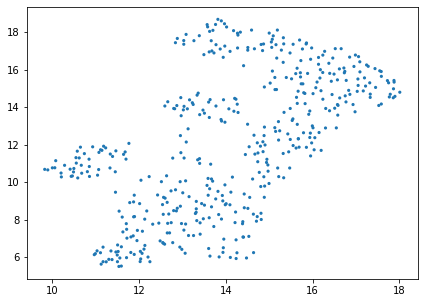

In [72]:
embedding = umap.UMAP(n_neighbors=150, min_dist=0.5, random_state=12).fit_transform(x_svd_noComment)

plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], 

s = 10, # size
edgecolor='none'
)
plt.show()

In [73]:
#WordCloud

D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


D:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


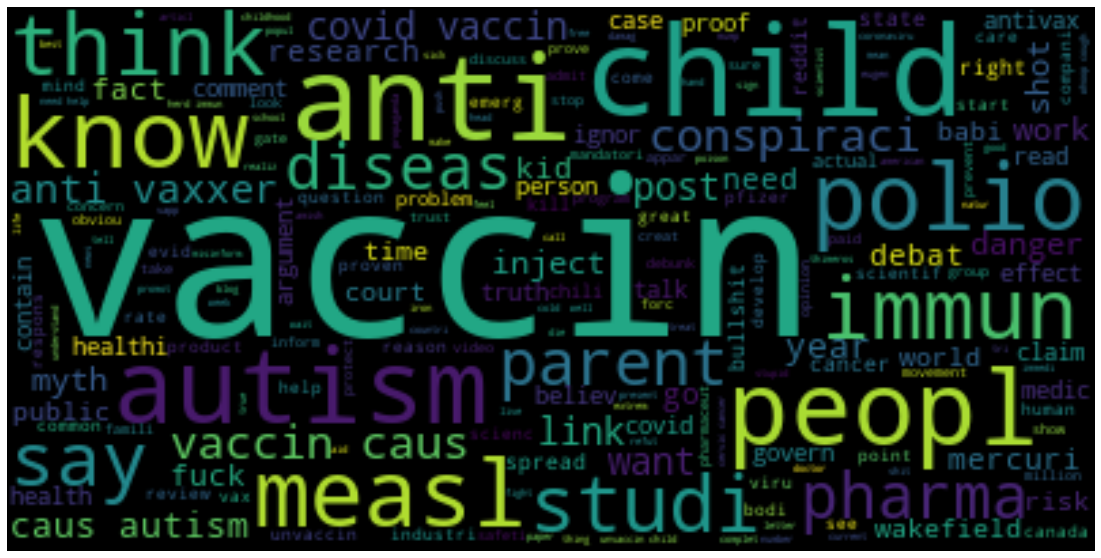

In [75]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


strings_no_comment = " ".join(detokenized_doc_no_comments)
wordcloud = WordCloud().generate(strings_no_comment)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()